In [1]:
from bilayer_clusters import trajIO
from bilayer_clusters import jenks_clusters
from bilayer_clusters import gvf
from bilayer_clusters import displacement

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
L, com_lipids, com_chol = trajIO.decompress("comTraj.npz")
com_lipids, com_chol = trajIO.translateZ(com_lipids, com_chol)
Nconf = L.shape[0]
nlog = 46
Nblock = Nconf // nlog

In [4]:
cluster_sizes = [3,4,5,6,7,8]

com_lipids = displacement.block_displacement(L,com_lipids)
com_chol = displacement.block_displacement(L,com_chol)

In [16]:
times = list(range(5,46))

In [5]:
#cluster dict
clusters = {} #cluster[nblock][time][layer][cluster_size]
for block in range(Nblock):
    clusters[block] = {}
    for t in times:
        clusters[block][t] = {}
        clusters[block][t]['lipids'] = {}
        clusters[block][t]['chol'] = {}
        for layer in ['upper','lower']:
            clusters[block][t]['lipids'][layer] = {}
            clusters[block][t]['chol'][layer] = {}

In [6]:
#running

for block in range(Nblock):
    for time in times:
        for size in cluster_sizes:
            t = block*nlog + time

            upper_lipids, lower_lipids = trajIO.layering(com_lipids[t])
            upper_chol, lower_chol = trajIO.layering(com_chol[t])
            
            clusters[block][time]['lipids']['upper'][size] = jenks_clusters.clusters(upper_lipids,size)
            clusters[block][time]['lipids']['lower'][size] = jenks_clusters.clusters(lower_lipids,size)
            
            clusters[block][time]['chol']['upper'][size] = jenks_clusters.clusters(upper_chol,size)
            clusters[block][time]['chol']['lower'][size] = jenks_clusters.clusters(lower_chol,size)
        

In [7]:
#gvf
gvfArr = {}
gvfArr['lipids'] = {}
gvfArr['chol'] = {}

for thing in ['chol','lipids']:
    for time in times:
        gvfArr[thing][time] = {}
        for size in cluster_sizes:
            gvfArr[thing][time][size] = []

In [8]:
for block in range(Nblock):
    for time in times:
        for size in cluster_sizes:
            for thing in ['chol','lipids']:
                for layer in ['upper','lower']:
                    gvfArr[thing][time][size].append(gvf.gvf(clusters[block][time][thing][layer][size]))

In [9]:
#turn into numpy arr
for time in times:
    for size in cluster_sizes:
        for thing in ['chol','lipids']:
            np.asarray(gvfArr[thing][time][size])

In [10]:
def gvft(thing,size,colour,arr=gvfArr):
    y = []
    for time in times:
        y.append(np.mean(arr[thing][time][size]))
    plt.plot(times,y,color=colour)
    

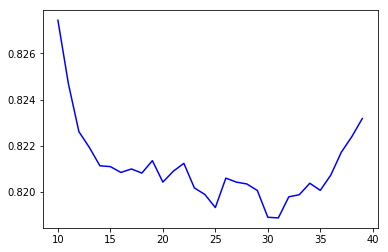

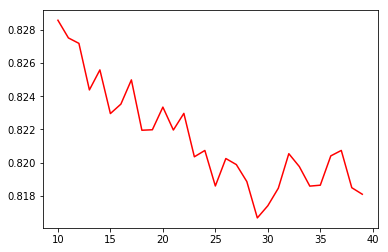

----------3-----------


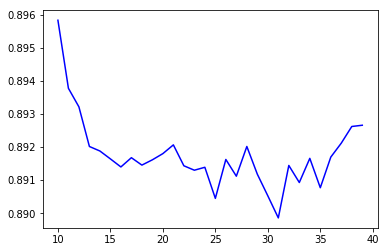

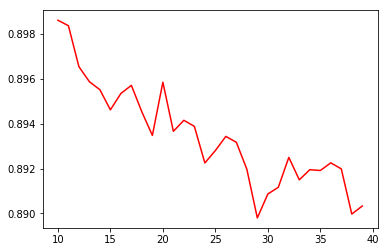

----------4-----------


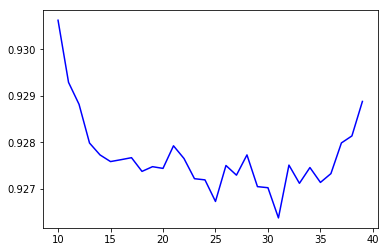

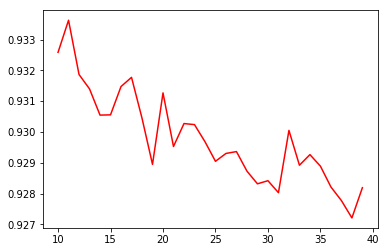

----------5-----------


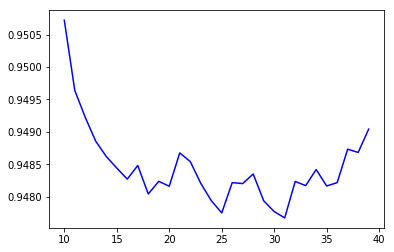

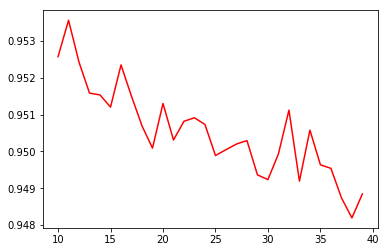

----------6-----------


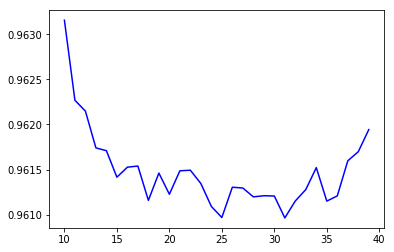

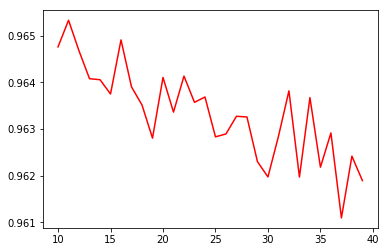

----------7-----------


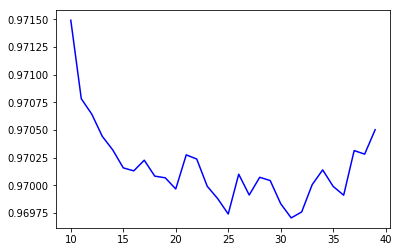

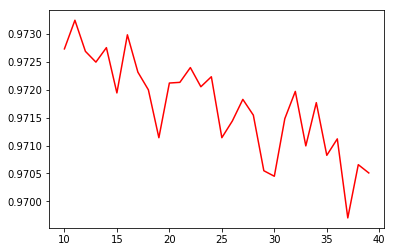

----------8-----------


In [51]:
for size in cluster_sizes:
    gvft('lipids',size,'b')
    plt.show()
    gvft('chol',size,'r')
    plt.show()
    print("----------"+str(size)+"-----------")

In [14]:
def sizet(thing,size,arr=c_size):
    colors = ['b', 'c', 'y', 'm', 'r','k','b','c']
    
    for i in range(size):
        y = []
    
        for time in times:
            y.append(np.mean(arr[thing][time][size][i]))
            
        plt.plot(times,y,color=colors[i])
        plt.show()

In [81]:
times = list(range(29,38))

In [82]:
#cluster size
c_size = {}
c_size['lipids'] = {}
c_size['chol'] = {}

for thing in ['chol','lipids']:
    for time in times:
        c_size[thing][time] = {}
        for size in cluster_sizes:
            c_size[thing][time][size] = [[] for i in range(size)]

In [83]:
for block in range(Nblock):
    for time in times:
        for size in cluster_sizes:
            for thing in ['chol','lipids']:
                for layer in ['upper','lower']:
    
                    temp = list(map(lambda x: len(x),clusters[block][time][thing][layer][size]))
                    temp = np.asarray(temp)
                    summ = np.sum(temp)
                    temp = temp / summ
            
                    for i in range(size):
                        c_size[thing][time][size][i].append(temp[i])

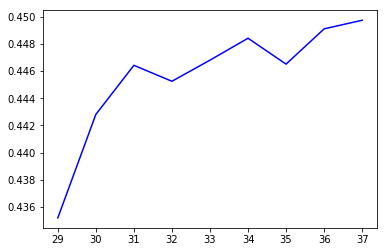

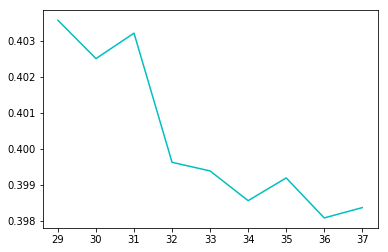

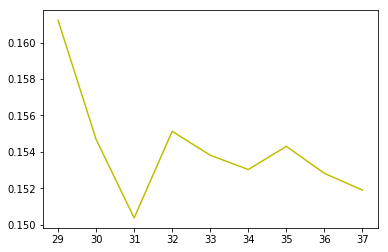

----------3-----------


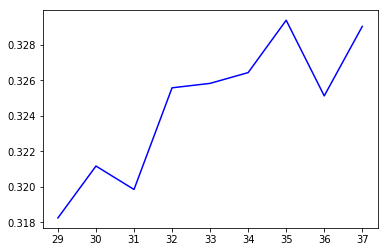

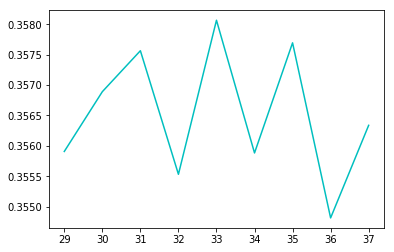

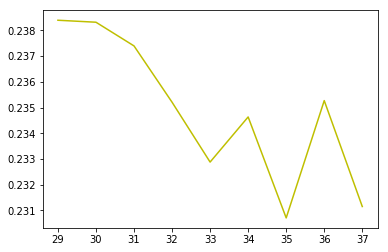

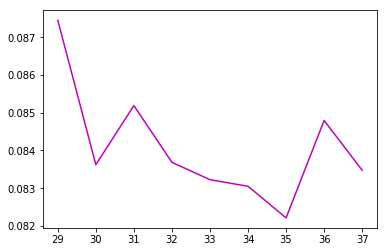

----------4-----------


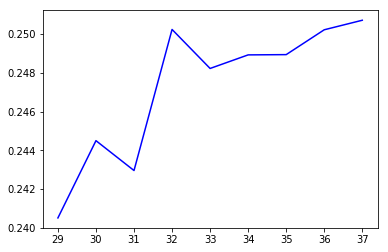

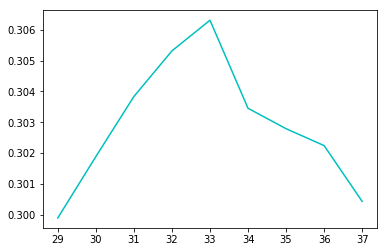

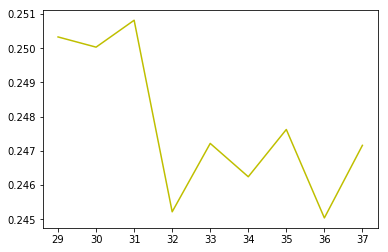

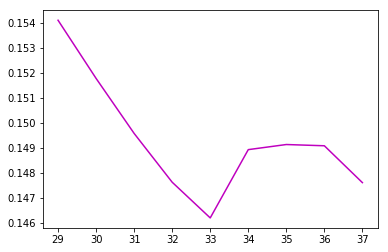

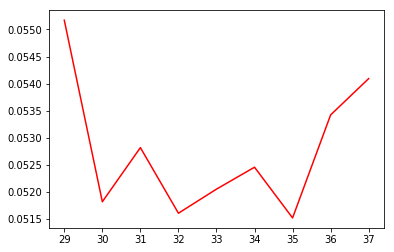

----------5-----------


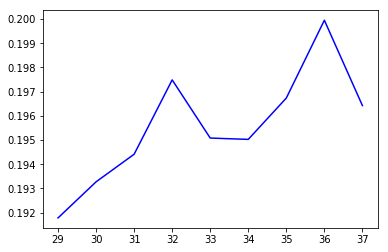

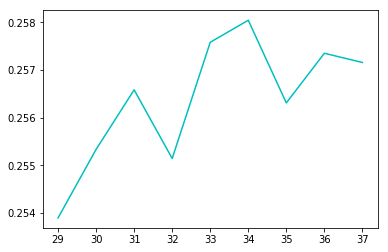

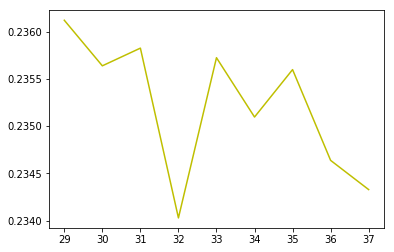

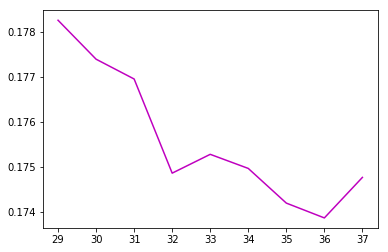

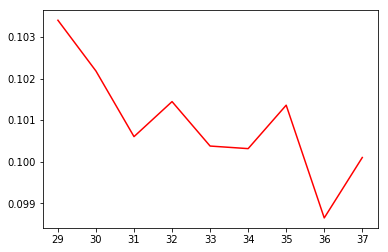

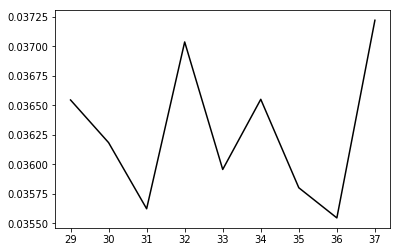

----------6-----------


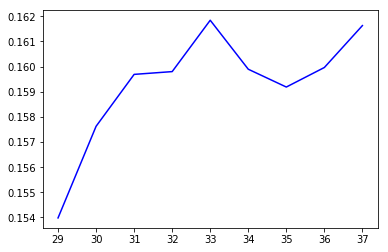

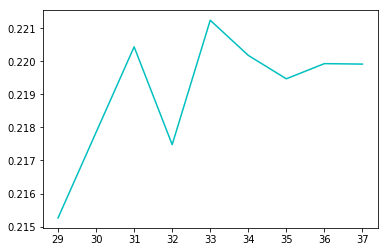

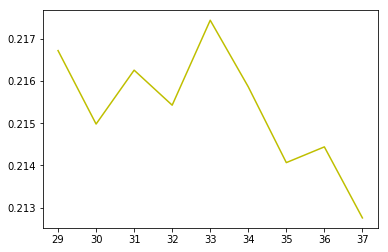

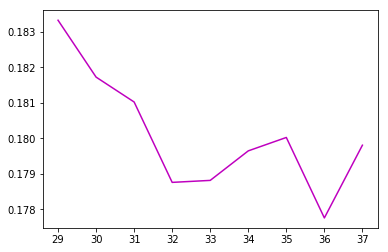

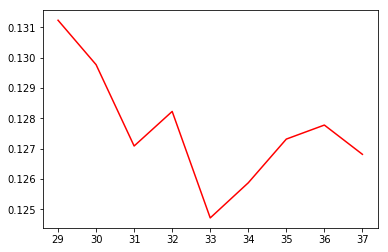

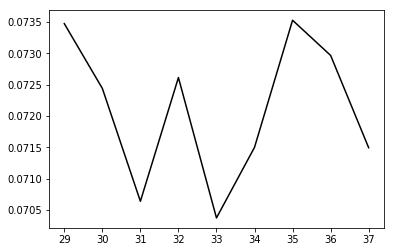

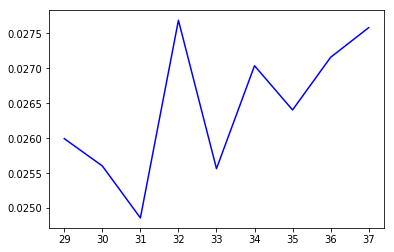

----------7-----------


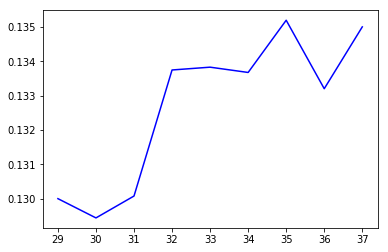

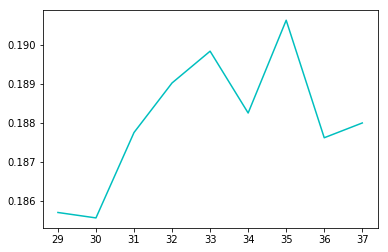

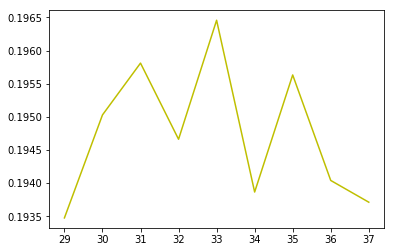

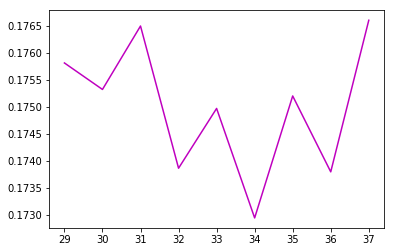

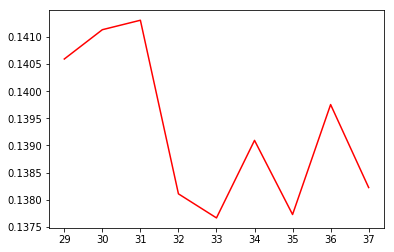

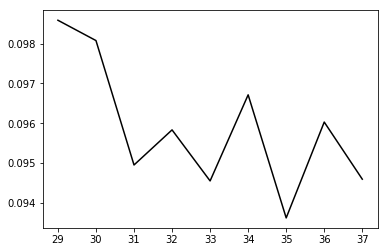

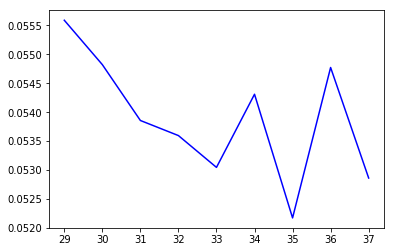

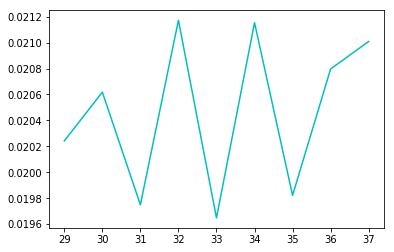

----------8-----------


In [84]:
for size in cluster_sizes:
    sizet('lipids',size)
    plt.show()
    #sizet('chol',size)
    #plt.show()
    print("----------"+str(size)+"-----------")

#seems like slow clusters peak at characteristic time step

In [85]:
print(times)

[29, 30, 31, 32, 33, 34, 35, 36, 37]
